In [1]:
import cv2 #pip install opencv-python

In [2]:
import matplotlib.pyplot as plt

In [4]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [5]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [6]:
classLabels = []
file_name = 'labels.txt'
with open(file_name,'rt') as f:
    classLabels = f.read().strip('\n').split('\n')

In [7]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ##255/2
model.setInputMean((127.5,127.5,127.5)) ## mobilnet => [-1,1]
model.setInputSwapRB(True)

<dnn_Model 000001257F2CB550>

## Read an image

In [9]:
img = cv2.imread('street.jpg')

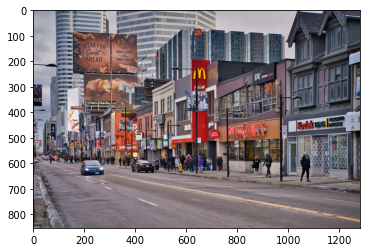

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))# opencv uses BGR

In [11]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold = 0.5)

In [12]:
print(ClassIndex)

[[ 1]
 [ 3]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [10]]


In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale = font_scale,color = (0,255,0),thickness = 2)

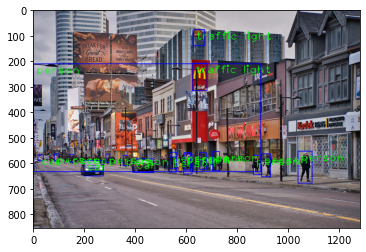

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## Video Demo

In [20]:
cap = cv2.VideoCapture('The BEST Plays of the 2019 NBA Finals  Presented by YouTubeTV.mp4')

# Checking if the Video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("[!] Cannot open video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
while True:
    success,frame = cap.read()
    
    ClassIndex, confidence,bbox = model.detect(frame,confThreshold = 0.55)
    
#     print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(), confidence.flatten(),bbox):
            if ClassInd<=80:
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color = (0,255,0),thickness=3)
    cv2.imshow('Object detection Demo',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

    

In [21]:
img = cv2.imread('vlcsnap-2021-09-25-23h00m46s965.png')

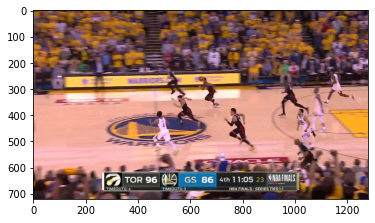

In [22]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))# opencv uses BGR